In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf

In [70]:
class Fiance():
    def __init__(self,symbol,start,end):
        self._symbol = symbol
        self.start = start
        self.end = end
        self.get_data()
        self.Return()
        print(f"Fiance symbol:{self._symbol} start:{self.start} end:{self.end}")
        
    def get_data(self):
        data = yf.download(self._symbol,self.start,self.end).Close.to_frame()
        data.rename(columns ={"Close" : "price"}, inplace=True)
        self.data = data
        return data 
        
    def Return(self):
        self.data["return"] = self.data.price.pct_change(periods=1)
        self.data["log_return"] = np.log(self.data.price/self.data.price.shift(periods=1))

    def plot_price(self,k = "plt"):
        data = self.data
        if k == "plt":
            data.price.plot(figsize=(15,8))
        elif(k == "hist"):
            data.log_return.hist(figsize=(15,8))
        else:
            
        
        
    

In [71]:
fin = Fiance("AAPL","2014-10-10","2024-10-10")

[*********************100%***********************]  1 of 1 completed

Fiance symbol:AAPL start:2014-10-10 end:2024-10-10


In [72]:
fin.data

,price,return,log_return
Date,,,
2014-10-10,25.182501,NaN,NaN
2014-10-13,24.952499,-0.009133,-0.009175
2014-10-14,24.687500,-0.010620,-0.010677
2014-10-15,24.385000,-0.012253,-0.012329
2014-10-16,24.065001,-0.013123,-0.013210
...,...,...,...
2024-10-03,225.669998,-0.004895,-0.004907
2024-10-04,226.800003,0.005007,0.004995
2024-10-07,221.690002,-0.022531,-0.022789


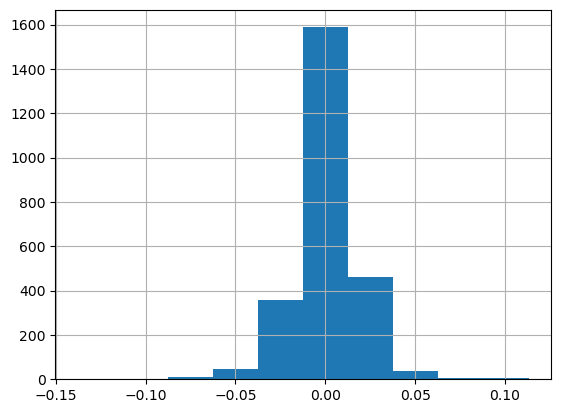

In [76]:
fin.plot_price("hist")